# ECG Signal Classification with Deep Learning: Leveraging Convolutional Neural Networks(CNN) for Accurate Arrhythmia Detection

### Connecting with the Google driver

DataSet Used: Sudden Cardiac Death Holter Database

https://drive.google.com/file/d/1OsyI4ytQ6F4kSX6iESjYrgbqUSoJfAC4/view?usp=drive_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


kaggle ECG Dataset: https://www.kaggle.com/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset

### Importing the required dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import classification_report

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Conv1D, MaxPool1D, Input, MaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

### Loading and Analysing the ECG Dataset

Loading ECG Dataset

In [ ]:
filepath = '/content/drive/MyDrive/ECG Dataset/Sudden Cardiac Death Holter Database.csv'
data = pd.read_csv(filepath, dtype='object')

Exploratory ECG Dataset Analysis

In [ ]:
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,30.0,N,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4.0,...,-0.131451,29.0,17.0,95.0,49.0,-0.131451,-0.015809,0.109493,-0.153622,-0.200331
1,30.0,N,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25.0,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,30.0,N,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29.0,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,30.0,N,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36.0,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,30.0,N,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39.0,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637


In [ ]:
data.shape

(502808, 34)

In [ ]:
data.keys()

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data.isnull().sum()

record             76217
type               76217
0_pre-RR           76217
0_post-RR          76217
0_pPeak            76217
0_tPeak            76217
0_rPeak            76217
0_sPeak            76217
0_qPeak            76217
0_qrs_interval     76217
0_pq_interval      76217
0_qt_interval      76217
0_st_interval      76217
0_qrs_morph0       76217
0_qrs_morph1       76217
0_qrs_morph2       76217
0_qrs_morph3       76217
0_qrs_morph4       76217
1_pre-RR          174615
1_post-RR         174615
1_pPeak           174615
1_tPeak           174615
1_rPeak           174615
1_sPeak           174615
1_qPeak           174615
1_qrs_interval    174615
1_pq_interval     174615
1_qt_interval     174615
1_st_interval     174615
1_qrs_morph0      174615
1_qrs_morph1      174615
1_qrs_morph2      174615
1_qrs_morph3      174615
1_qrs_morph4      174615
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502808 entries, 0 to 502807
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          426591 non-null  float64
 1   type            426591 non-null  object 
 2   0_pre-RR        426591 non-null  float64
 3   0_post-RR       426591 non-null  float64
 4   0_pPeak         426591 non-null  float64
 5   0_tPeak         426591 non-null  float64
 6   0_rPeak         426591 non-null  float64
 7   0_sPeak         426591 non-null  float64
 8   0_qPeak         426591 non-null  float64
 9   0_qrs_interval  426591 non-null  float64
 10  0_pq_interval   426591 non-null  float64
 11  0_qt_interval   426591 non-null  float64
 12  0_st_interval   426591 non-null  float64
 13  0_qrs_morph0    426591 non-null  float64
 14  0_qrs_morph1    426591 non-null  float64
 15  0_qrs_morph2    426591 non-null  float64
 16  0_qrs_morph3    426591 non-null  float64
 17  0_qrs_morp

In [ ]:
data.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,...,328193.000000,328193.000000,328193.000000,328193.000000,328193.000000,328193.000000,328193.000000,328193.000000,328193.000000,328193.000000
mean,40.857536,229.428994,229.528063,0.060205,0.571717,0.260093,-0.158574,-0.077361,19.515555,12.388290,...,-0.183966,6.833708,11.164422,30.786095,12.787966,-0.183966,-0.205449,-0.230608,-0.259178,-0.298102
std,7.990506,52.765916,55.298502,0.156438,0.563064,0.403469,0.368323,0.121842,14.753913,10.731138,...,0.157514,9.455420,6.858378,14.885997,7.360715,0.157514,0.162977,0.190383,0.221611,0.218565
min,30.000000,2.000000,14.000000,-1.601843,-1.640672,-2.224594,-3.106228,-2.931771,0.000000,1.000000,...,-3.090529,0.000000,1.000000,3.000000,1.000000,-3.090529,-3.038832,-2.923414,-2.806248,-2.931610
25%,35.000000,192.000000,192.000000,-0.007642,0.142914,-0.034951,-0.483457,-0.107943,7.000000,5.000000,...,-0.252478,2.000000,6.000000,21.000000,6.000000,-0.252478,-0.290034,-0.350250,-0.419563,-0.475214
50%,36.000000,224.000000,224.000000,0.030988,0.366103,0.065296,-0.061481,-0.061239,19.000000,10.000000,...,-0.152997,5.000000,9.000000,31.000000,12.000000,-0.152997,-0.195012,-0.257704,-0.313413,-0.342680
75%,49.000000,270.000000,270.000000,0.087963,1.092672,0.629200,-0.012880,-0.029183,30.000000,17.000000,...,-0.079190,6.000000,17.000000,39.000000,18.000000,-0.079190,-0.089838,-0.090286,-0.088545,-0.094998
max,52.000000,2228.000000,10964.000000,3.341772,2.759539,2.434247,2.404205,2.050436,232.000000,128.000000,...,1.939969,199.000000,127.000000,248.000000,115.000000,1.939969,1.849666,2.099905,1.437327,1.694488


### Data Preprocessing

Drop rows with missing values

In [ ]:
data.dropna(inplace=True)

##### Extracted features and labels from the dataset

In [ ]:
x_data = data.iloc[:, 2:]
y_label = data[['type']]

Upsample the minority classes to balance the dataset

In [ ]:
value_counts = y_label.value_counts()
print(value_counts)

N       238887
VEB     238887
SVEB    238887
F       238887
Q       238887
Name: type, dtype: int64


In [ ]:
labels = value_counts.index.tolist()
labels

['N', 'VEB', 'SVEB', 'F', 'Q']

##### Handled class imbalance by resampling data

Visualized data distribution and class proportions using pie charts

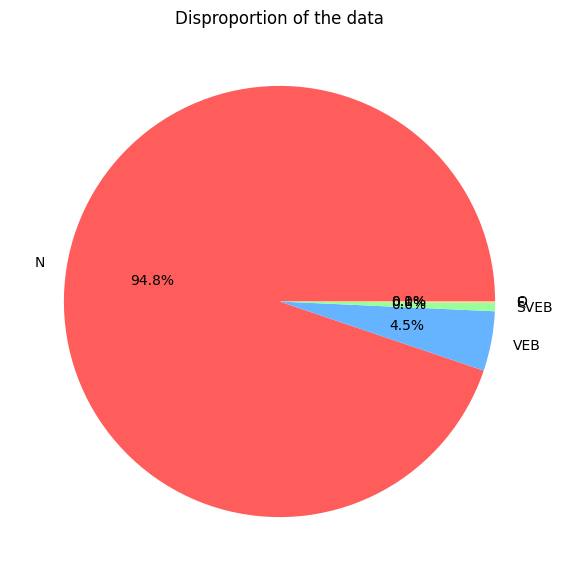

In [ ]:
plt.figure(figsize=(7, 7))
my_circle = plt.Circle((0, 0), 0.7, color='white')

value_counts = data['type'].value_counts()
labels = value_counts.index.tolist()

plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Disproportion of the data')
plt.show()

In [ ]:
original_class_distribution = data['type'].value_counts()
print("Original class distribution:")
print(original_class_distribution)

Original class distribution:
N       238887
VEB      11266
SVEB      1570
F          210
Q           43
Name: type, dtype: int64


In [ ]:
majority_class = original_class_distribution.idxmax()
majority_class_count = original_class_distribution.max()

target_samples = majority_class_count

upsampled_data = pd.DataFrame()

for label in original_class_distribution.index:
    class_data = data[data['type'] == label]

    if label == majority_class:
        upsampled_data = pd.concat([upsampled_data, class_data])
    else:
        upsampled_data = pd.concat([upsampled_data, resample(class_data, replace=True, n_samples=target_samples, random_state=42)])

balanced_class_distribution = upsampled_data['type'].value_counts()
print("\nBalanced class distribution:")
print(balanced_class_distribution)


Balanced class distribution:
N       238887
VEB     238887
SVEB    238887
F       238887
Q       238887
Name: type, dtype: int64


Plot pie charts for the original and balanced class distributions

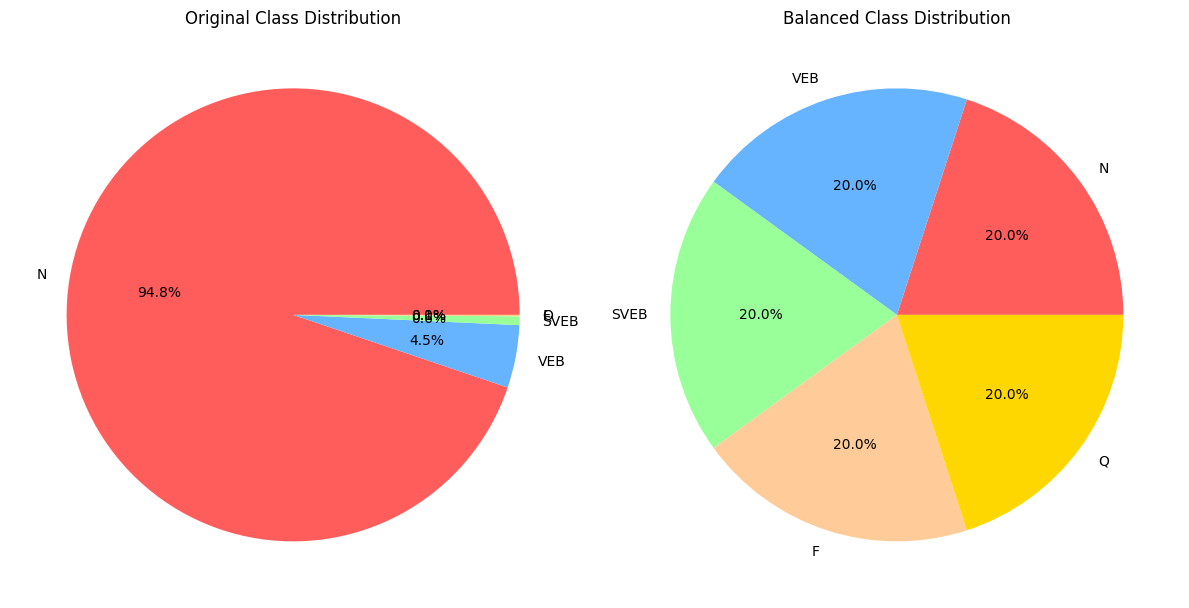

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(original_class_distribution, labels=original_class_distribution.index, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Original Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(balanced_class_distribution, labels=balanced_class_distribution.index, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Balanced Class Distribution')

plt.tight_layout()
plt.show()


Handle class imbalance by resampling

In [ ]:
upsampled_data = pd.DataFrame()
target_samples = data['type'].value_counts().max()

for label in data['type'].unique():
    class_data = data[data['type'] == label]
    if len(class_data) < target_samples:
        upsampled_data = pd.concat([upsampled_data, resample(class_data, replace=True, n_samples=target_samples, random_state=42)])
    else:
        upsampled_data = pd.concat([upsampled_data, class_data])

Resampled data

In [ ]:
x_data = upsampled_data.iloc[:, 2:]
y_label = upsampled_data['type']

### Label Encoding

Encode categorical labels

In [ ]:
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y_label)

### Data Splitting

Split the data into training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label_encoded, test_size=0.2, random_state=42)

### Scaling and Reshape

Scaled the feature data

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Reshape for CNN input

In [ ]:
x_train_reshaped = x_train_scaled[..., np.newaxis]
x_test_reshaped = x_test_scaled[..., np.newaxis]

print("x_train_reshaped shape:", x_train_reshaped.shape)
print("y_train shape:", y_train.shape)
print("x_test_reshaped shape:", x_test_reshaped.shape)
print("y_test shape:", y_test.shape)

x_train_reshaped shape: (955548, 32, 1)
y_train shape: (955548,)
x_test_reshaped shape: (238887, 32, 1)
y_test shape: (238887,)


### Model Architecture

In [ ]:
# !pip install --upgrade tensorflow


Defined a Convolutional Neural Network (CNN) model using TensorFlow and Keras

In [ ]:
model = Sequential([
    Input(shape=(x_train_reshaped.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

Compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Model Training and Evaluation

Train the model

In [ ]:
history = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9441 - loss: 0.1793 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 2/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.9871 - loss: 0.0474 - val_accuracy: 0.9905 - val_loss: 0.0371
Epoch 3/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9911 - loss: 0.0342 - val_accuracy: 0.9930 - val_loss: 0.0294
Epoch 4/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9926 - loss: 0.0285 - val_accuracy: 0.9936 - val_loss: 0.0264
Epoch 5/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9935 - loss: 0.0256 - val_accuracy: 0.9929 - val_loss: 0.0285
Epoch 6/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.9942 - loss: 0.0236 - val_accuracy: 0.9935 - val_loss: 0.0430
Epoch 7/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9948 - loss: 0.0211 - val_accuracy: 0.9956 - val_loss: 0.0214
Epoch 8/10
23889/23889 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 

Evaluate the model on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=0)
print(f'Test set accuracy: {test_accuracy * 100:.2f}%')

Test set accuracy: 99.57%


### Confusion Matrix and Classification Report

 Making predictions on the test set

In [ ]:
y_test_pred_probs = model.predict(x_test_reshaped)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
print(y_test_pred)

7466/7466 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
[0 1 0 ... 2 1 2]


Generated a confusion matrix and visualization for better understanding of model performance

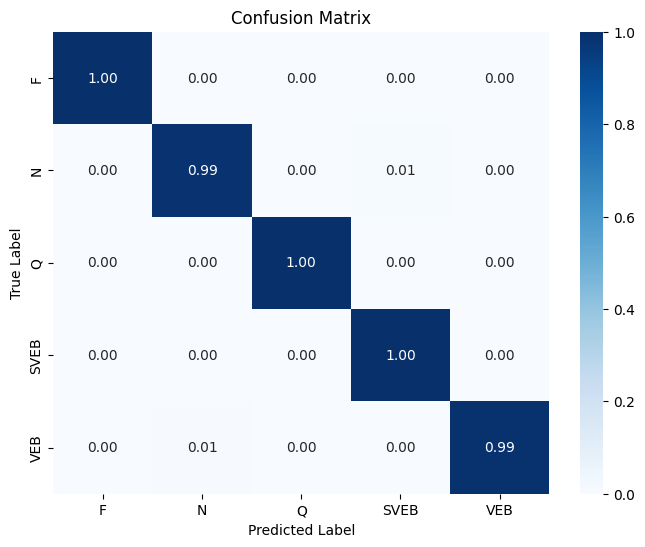

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Calculated precision, recall, F1-score, and Accuracy

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           F       1.00      1.00      1.00     47767
           N       0.99      0.99      0.99     47578
           Q       1.00      1.00      1.00     47855
        SVEB       0.99      1.00      1.00     47750
         VEB       1.00      0.99      0.99     47937

    accuracy                           1.00    238887
   macro avg       1.00      1.00      1.00    238887
weighted avg       1.00      1.00      1.00    238887



### Final Result Visualization

Plotting the accuracy

<Figure size 1200x500 with 0 Axes>

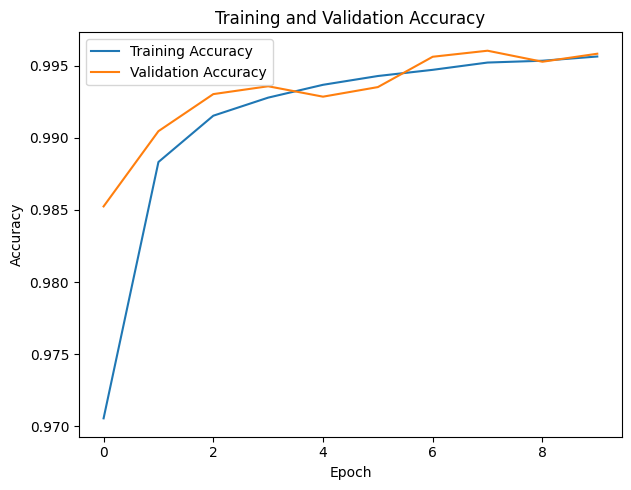

In [ ]:
plt.figure(figsize=(12, 5))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Plotting the loss

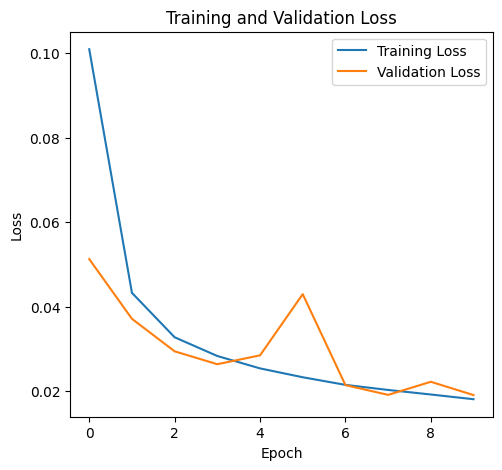

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Plotting validation accuracy

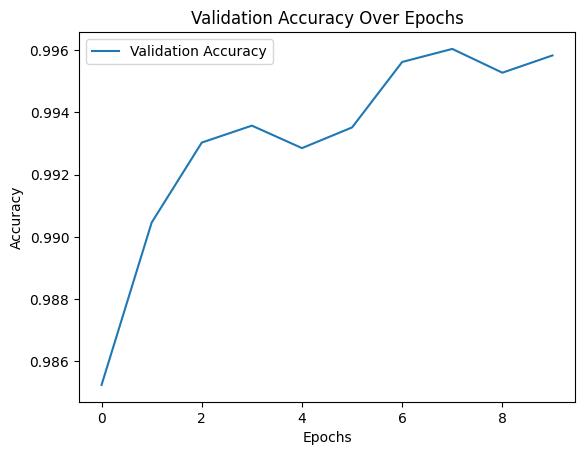

In [ ]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plotting validation loss

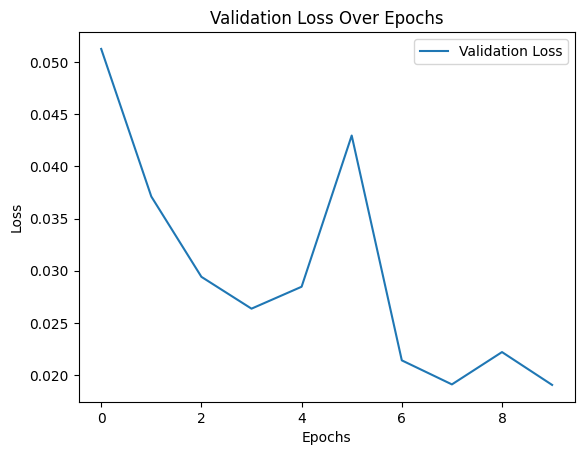

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model summary

Unique classes in the dataset

In [ ]:
print("Unique classes in the dataset:", len(label_encoder.classes_))

Unique classes in the dataset: 5


About Model

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 30, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          30,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,713 (366.07 KB)

 Trainable params: 31,237 (122.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,476 (244.05 KB)